🎯 Projeto: Previsão do preço de casas com Regressão Linear Múltipla


In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd 

california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


📌 Análise Exploratória

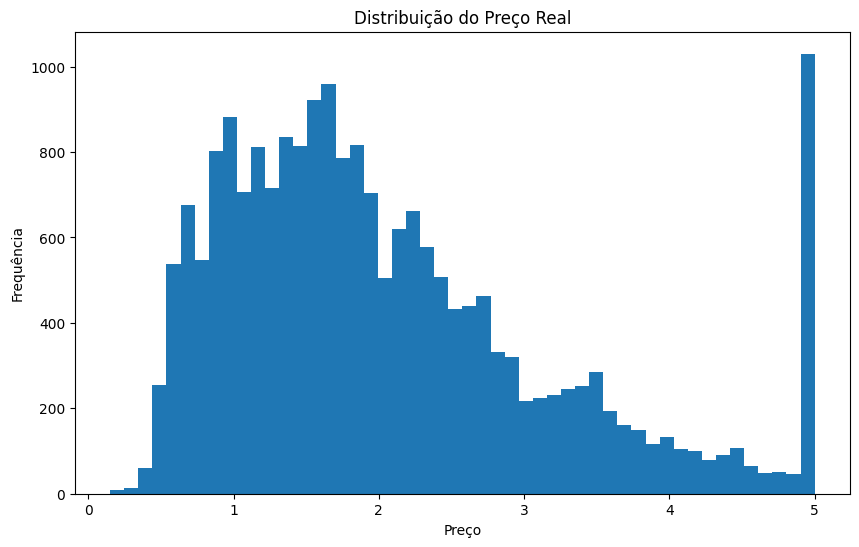

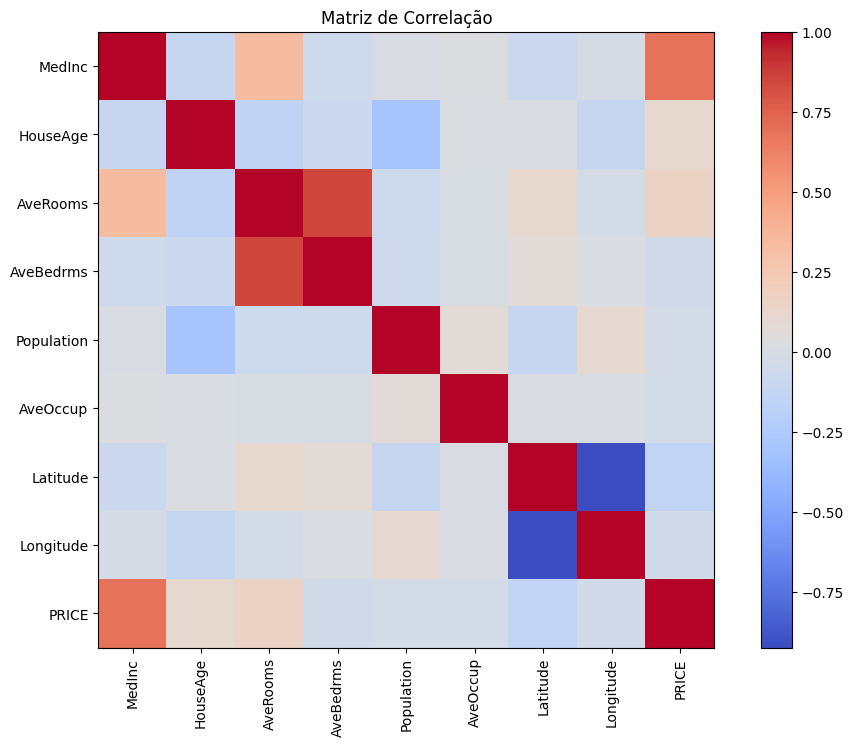

In [22]:
# Visualização da distribuição do preço real
california_df['PRICE'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.title('Distribuição do Preço Real')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Visualização da correlação entre as variáveis
correlation_matrix = california_df.corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriz de Correlação')
plt.show()

In [23]:
# Variávels independentes e dependentes

X = california_df.drop('PRICE', axis=1) # Usar todas as colunas menos 'PRICE' como variáveis independentes
y = california_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Coeficientes: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercepto: -37.023277706064185
R²: 0.6053286007096408


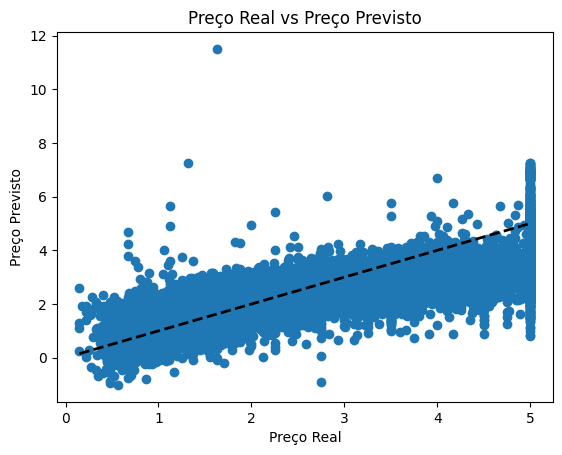

In [24]:
# Modelo de Regressão Linear

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X)

print(f'Coeficientes: {modelo.coef_}')
print(f'Intercepto: {modelo.intercept_}')

print(f'R²: {r2_score(y, y_pred)}')

# Visualização dos resultados
plt.scatter(y, y_pred)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Preço Real vs Preço Previsto')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()